In [1]:
# IMPORT REQUIRED LIBRARY

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
# LOAD THE CSV FILE

data = pd.read_csv('/content/retail.csv')

In [4]:
# MAKE A DATA FRAME

df = pd.DataFrame(data)

In [5]:
df.shape

(3900, 19)

In [6]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2677,2678,45,Female,Shorts,Clothing,43,Connecticut,L,Olive,Spring,3.8,No,Debit Card,Next Day Air,No,No,6,PayPal,Every 3 Months
2032,2033,46,Male,Blouse,Clothing,36,South Carolina,M,Maroon,Winter,4.2,No,Credit Card,Next Day Air,No,No,13,Cash,Annually
2586,2587,20,Male,Coat,Outerwear,28,Maine,L,Yellow,Winter,4.6,No,Venmo,Express,No,No,1,Credit Card,Every 3 Months
760,761,33,Male,Gloves,Accessories,50,Minnesota,XL,Violet,Fall,3.4,Yes,Credit Card,Free Shipping,Yes,Yes,6,Cash,Annually
1685,1686,33,Male,Blouse,Clothing,48,Minnesota,M,Pink,Winter,4.6,No,Venmo,Standard,No,No,43,PayPal,Bi-Weekly


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
# STATISTICAL ANALYSIS

df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [12]:
import pandas as pd
df_numerical = df.select_dtypes(include=["int64", "float64"])

In [13]:
# CORRELATION BETWEEN NUMERICAL COLUMN
df_numerical.corr()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


In [14]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [15]:
gender_counts = df['Gender'].value_counts()

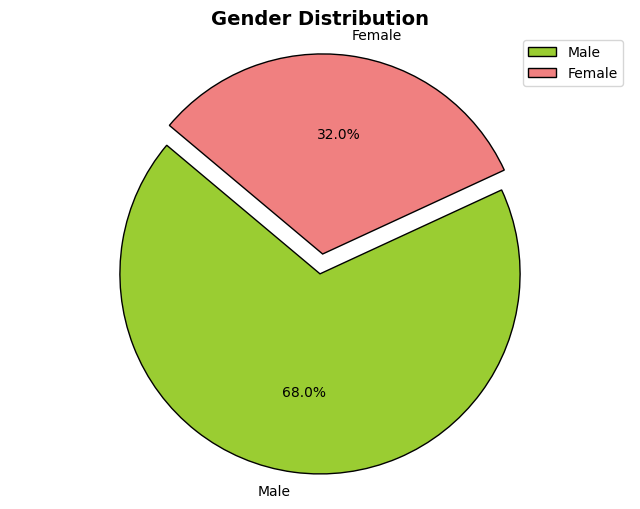

In [16]:
# GENDER DISTRIBUTION PIE CHART

explode = (0, 0.1)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, explode = explode, colors= ['yellowgreen','lightcoral'], wedgeprops={'edgecolor': 'black'} )
# plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.title('Gender Distribution', weight = "bold", fontsize = 14 )
plt.legend(labels = gender_counts.index, loc = "best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


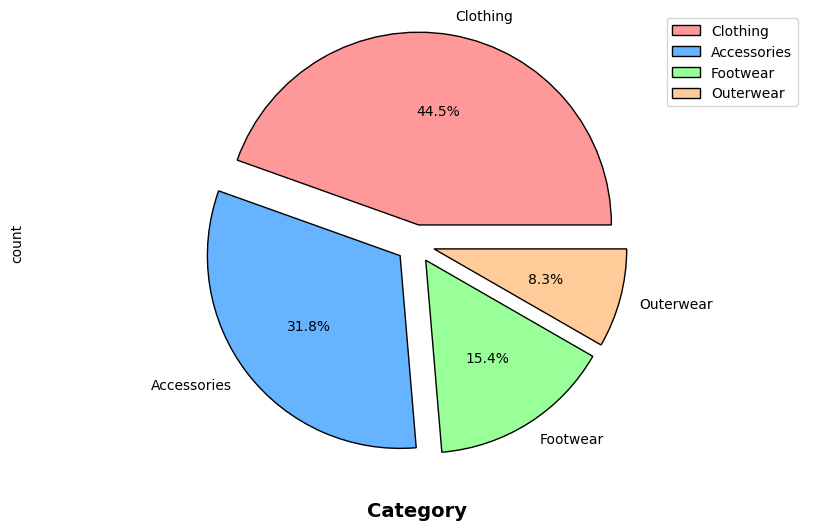

In [17]:
# CATEGORY PIE CHART

plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

counts = df["Category"].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)

counts.plot(kind='pie', fontsize=10, colors=colors, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.xlabel('Category', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()


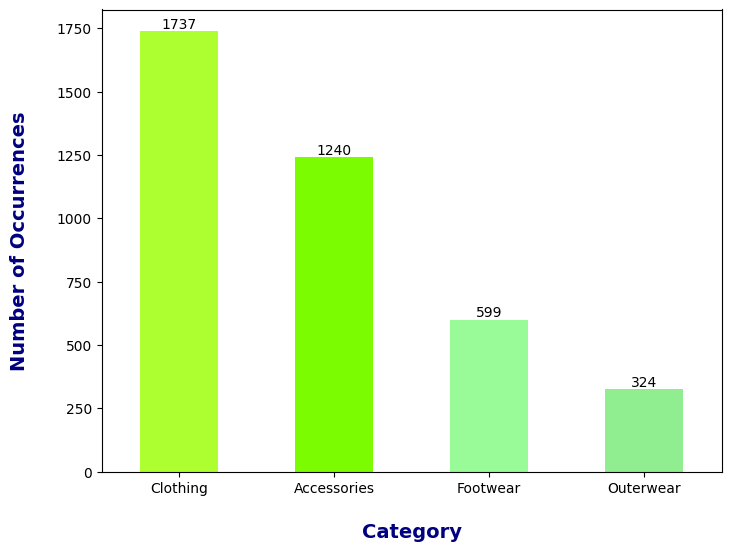

In [18]:
# CATEGORY BAR CHART

colour = ["greenyellow", "lawngreen", "palegreen", "lightgreen"]

plt.figure(figsize = (8, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colour, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Category', weight = "bold", color = "navy", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "navy", fontsize = 14, labelpad = 20);

In [19]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

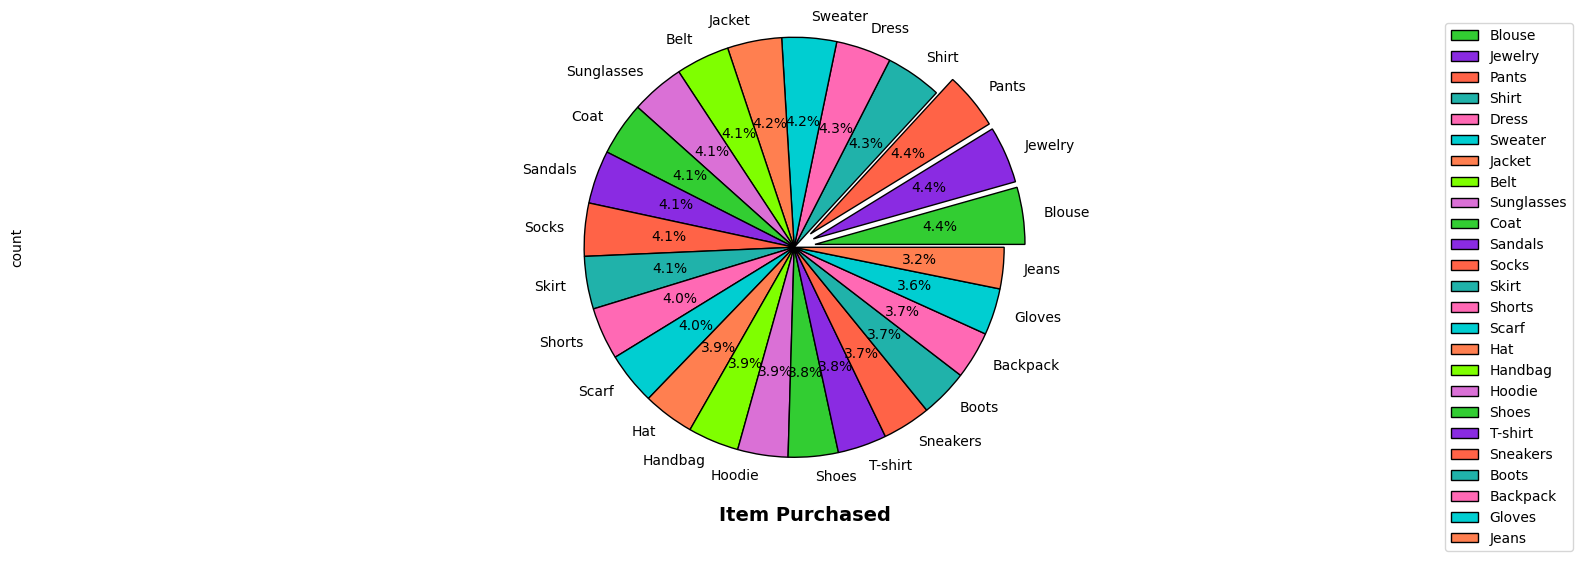

In [20]:
# ITEM PURCHASED PIE CHART

plt.figure(figsize=(20, 6))
colors = ["#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6",]

counts = df["Item Purchased"].value_counts()
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,)

counts.plot(kind='pie', fontsize=10, colors=colors, explode = explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.xlabel('Item Purchased', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

In [21]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

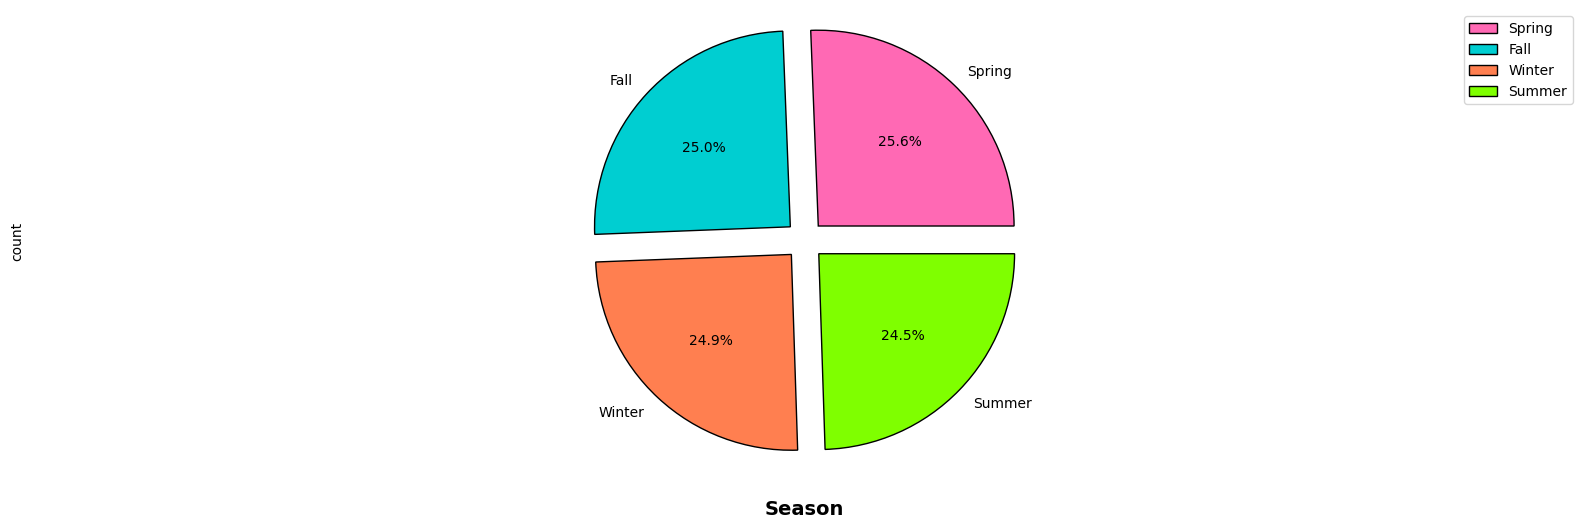

In [22]:
# SEASON PIE CHART

plt.figure(figsize=(20, 6))
colors = ["#FF69B4", "#00CED1", "#FF7F50", "#7FFF00"]

counts = df["Season"].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)

counts.plot(kind='pie', fontsize=10, colors=colors, explode = explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.xlabel('Season', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

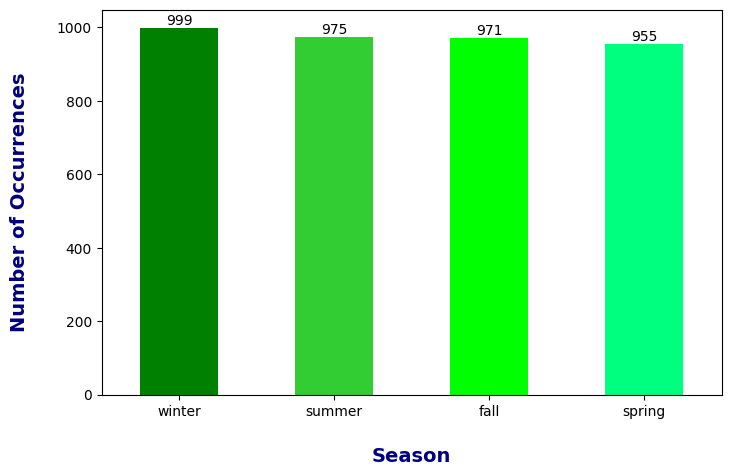

In [23]:
# SEASON BAR CHART

colour = ["green", "limegreen", "lime", "Springgreen"]

plt.figure(figsize = (8, 5))
a = df["Season"].value_counts().plot(kind = 'bar', color = colour, rot = 0)
a.set_xticklabels(('winter', 'summer', 'fall', 'spring'))

for p in a.patches:
    a.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    a.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Season', weight = "bold", color = "navy", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "navy", fontsize = 14, labelpad = 20);

In [24]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

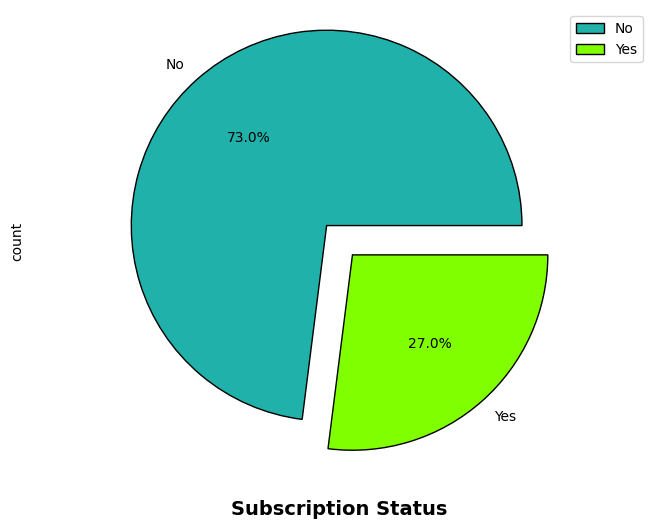

In [25]:
# SUBSCRIPTION STATUS PIE CHART

plt.figure(figsize=(8, 6))
colors = ["#20B2AA", "#7FFF00"]

counts = df["Subscription Status"].value_counts()
explode = (0.1, 0.1,)

counts.plot(kind='pie', fontsize=10, colors=colors, explode = explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.xlabel('Subscription Status', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

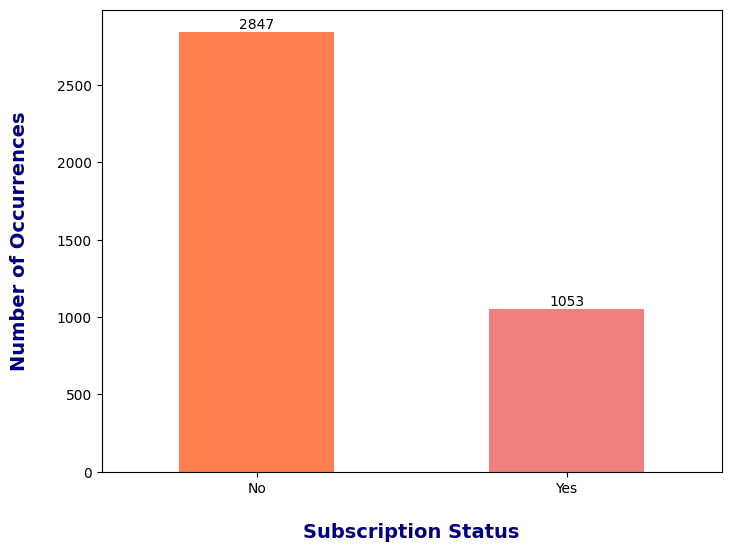

In [26]:
# SUBSCRIPTION STATUS BAR CHART

colour = ["coral", "lightcoral"]

plt.figure(figsize = (8, 6))
a = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colour, rot = 0)
a.set_xticklabels(('No', 'Yes'))

for p in a.patches:
    a.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    a.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Subscription Status', weight = "bold", color = "navy", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "navy", fontsize = 14, labelpad = 20);

In [27]:
df["Payment Method"].value_counts()

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

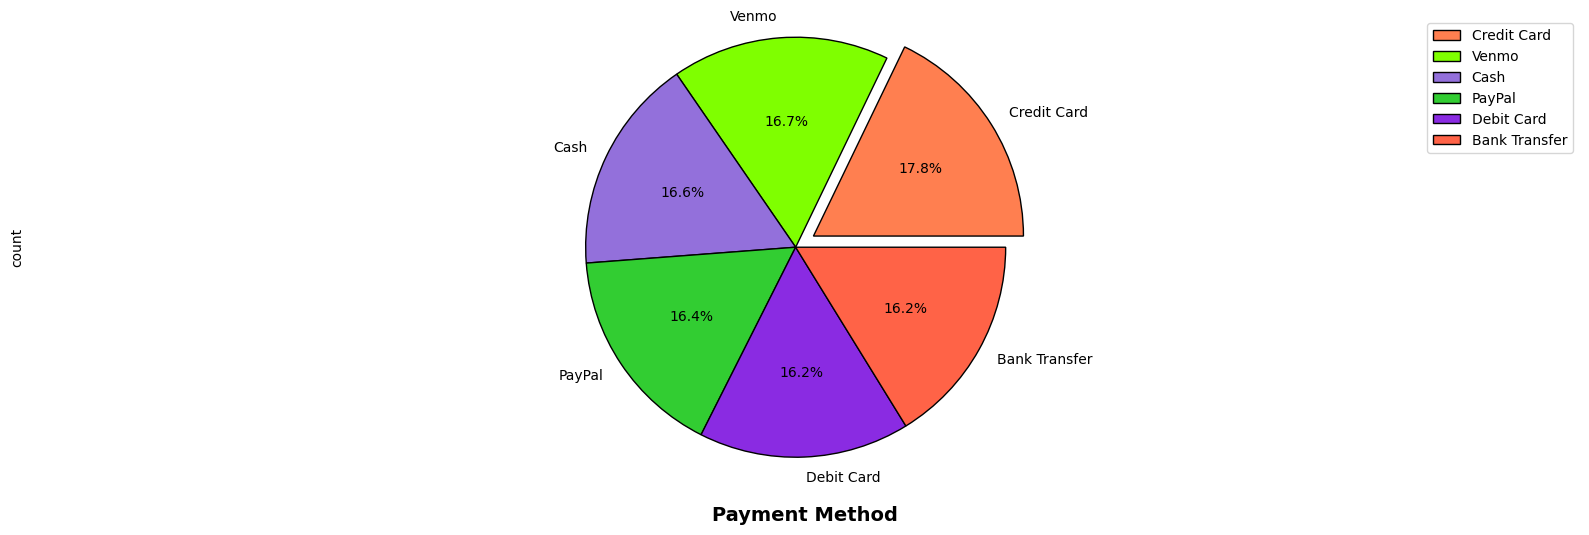

In [28]:
# PAYMENT METHOD PIE CHART

plt.figure(figsize=(20, 6))
colors = ["#FF7F50", "#7FFF00",  "#9370DB", "#32CD32", "#8A2BE2", "#FF6347",]

counts = df["Payment Method"].value_counts()
explode = (0.1, 0, 0, 0, 0, 0)

counts.plot(kind='pie', fontsize=10, colors=colors, explode = explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.xlabel('Payment Method', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

In [29]:
df["Frequency of Purchases"].value_counts().nunique()

7

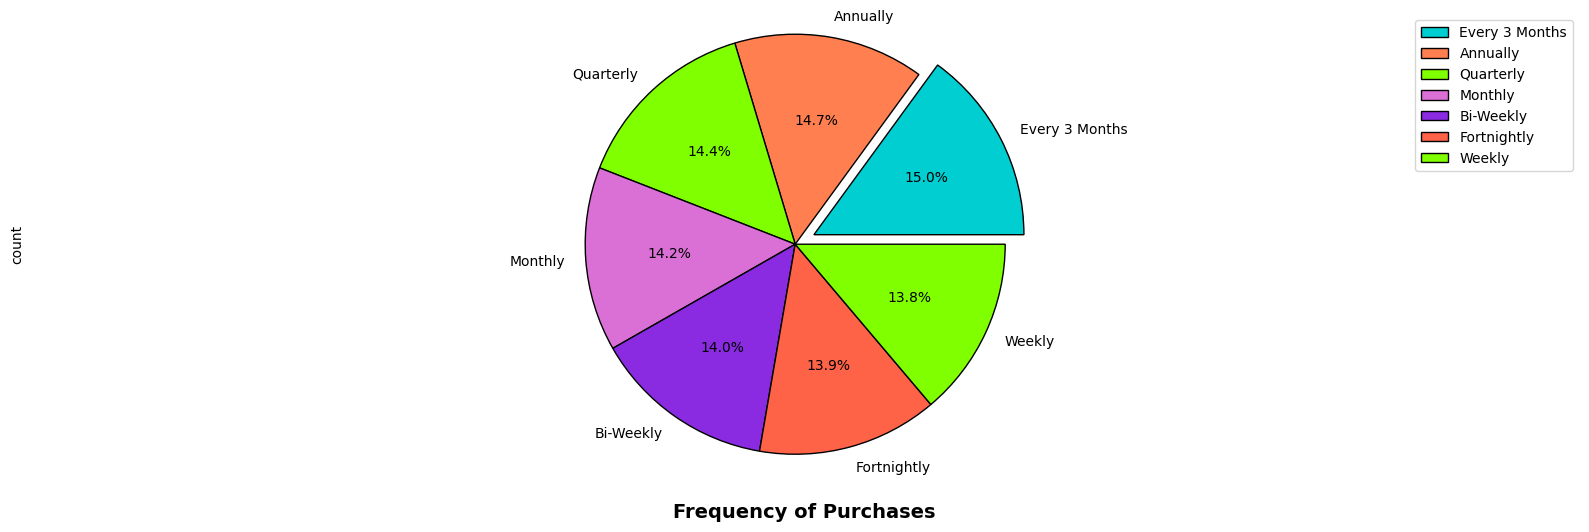

In [30]:
# FREQUENCIES OF PURCHASES PIE CHART

plt.figure(figsize=(20, 6))
colors = ["#00CED1", "#FF7F50", "#7FFF00", "#DA70D6", "#8A2BE2", "#FF6347", "#7FFF00"]

counts = df["Frequency of Purchases"].value_counts()
explode = (0.1, 0, 0, 0, 0, 0, 0)

counts.plot(kind='pie', fontsize=10, colors=colors, explode = explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.xlabel('Frequency of Purchases', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

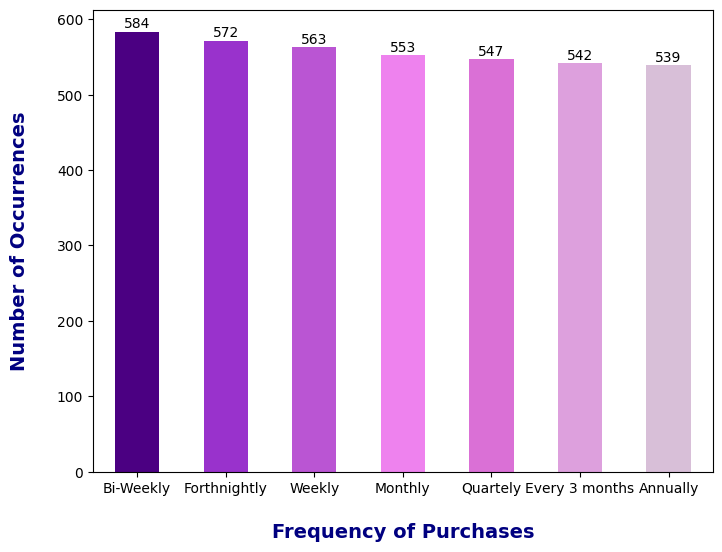

In [31]:
# FREQUENCIES OF PURCHASES BAR CHART

colour = ["INDIGO", "DARKORCHID", "mediumorchid", "violet", "orchid", "plum", "thistle"]

plt.figure(figsize = (8, 6))
a = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colour, rot = 0)
a.set_xticklabels(('Bi-Weekly', 'Forthnightly', 'Weekly', 'Monthly', 'Quartely', 'Every 3 months', 'Annually'))

for p in a.patches:
    a.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    a.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "navy", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "navy", fontsize = 14, labelpad = 20);

In [32]:
# Add new column named "sales" to the data (obtained by multiplying quantity with unit price):
data['Sales'] = data['Purchase Amount (USD)']*data['Previous Purchases']

# Show transformed data:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Sales
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,742
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,128
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1679
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,4410
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1519


In [33]:
df_updated = df.drop(['Color','Customer ID'], axis = 1)

In [34]:
df_updated

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


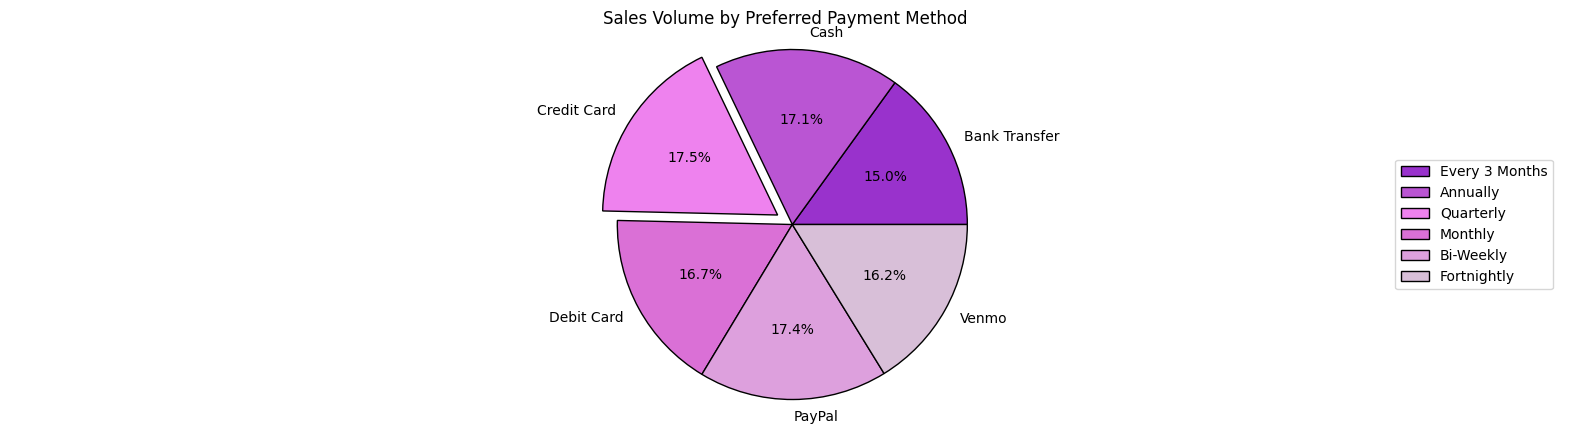

In [35]:
colors = ["darkorchid", "mediumorchid", "violet", "orchid", "plum", "thistle"]
plt.figure(figsize=(20, 5))
data.groupby('Preferred Payment Method')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black'}, explode=[0,0,0.1,0,0,0])
plt.title('Sales Volume by Preferred Payment Method')
plt.axis('equal')
plt.legend(labels=counts.index, loc="right")
plt.ylabel('')
plt.show()

In [36]:
# SELECTED COLUMN FOR STANDARD SCALING

selected_col = ['Purchase Amount (USD)','Review Rating','Previous Purchases']
x = df_updated[selected_col]
x.head()

,Purchase Amount (USD),Review Rating,Previous Purchases
0,53,3.1,14
1,64,3.1,2
2,73,3.1,23
3,90,3.5,49
4,49,2.7,31


In [37]:
y = data['Sales']

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std_scaler = StandardScaler()

In [40]:
x_std = std_scaler.fit_transform(x)
x_std
x_std_df = pd.DataFrame(x_std)

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
# SELECTED COLUMN FOR ONE HOT ENCODING

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Gender', 'Item Purchased','Category', 'Location', 'Size'	,'Season', 'Subscription Status',	'Payment Method',	'Shipping Type',	'Discount Applied',	'Promo Code Used', 'Preferred Payment Method',	'Frequency of Purchases']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
encoded_categories = encoder.get_feature_names_out(['Gender', 'Item Purchased', 'Category', 'Location', 'Size'	,'Season', 'Subscription Status',	'Payment Method', 'Shipping Type',	'Discount Applied',	'Promo Code Used', 'Preferred Payment Method',	'Frequency of Purchases'])

In [44]:
encoded_df = pd.DataFrame(encoded_features, columns=encoded_categories)
encoded_df

,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,Item Purchased_Handbag,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# RENAME OF STANDARD SCALING COLUMN

new_columns = ['X', 'Y', 'Z']
x_std_df.columns = new_columns
x_std_df.rename(columns={'X': 'Purchase Amount', 'Y': 'Review Rating', 'Z': 'Previous Purchases'}, inplace=True)
x_std_df

,Purchase Amount,Review Rating,Previous Purchases
0,-0.285629,-0.907584,-0.785831
1,0.178852,-0.907584,-1.616552
2,0.558882,-0.907584,-0.162789
3,1.276716,-0.349027,1.637107
4,-0.454531,-1.466141,0.391025
...,...,...,...
3895,-1.341267,0.628448,0.460252
3896,-0.454531,1.047366,1.083293
3897,-1.130139,-1.186862,-0.093563
3898,0.727784,0.069891,-0.093563


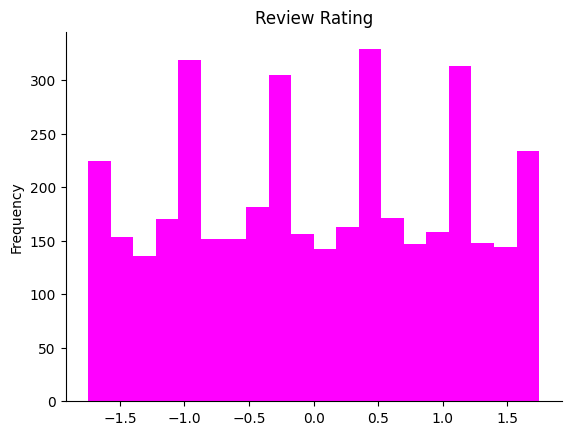

In [46]:
# title Review Rating

from matplotlib import pyplot as plt
x_std_df['Review Rating'].plot(kind='hist', bins=20, title='Review Rating', color = 'magenta')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [47]:
# MERGE TWO TYPE OF DIFFERENT COLUMN. ONE OF ONE HOT ENCODED AND ANOTHER ONE ID STANDARD SCALER COLUMN

df_encoded = pd.concat([x_std_df, encoded_df], axis = 1)
df_encoded

,Purchase Amount,Review Rating,Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,-0.285629,-0.907584,-0.785831,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.178852,-0.907584,-1.616552,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.558882,-0.907584,-0.162789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.276716,-0.349027,1.637107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.454531,-1.466141,0.391025,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-1.341267,0.628448,0.460252,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,-0.454531,1.047366,1.083293,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,-1.130139,-1.186862,-0.093563,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,0.727784,0.069891,-0.093563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
print(df_encoded.shape)

(3900, 123)


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.2)

In [50]:
x_train.shape, x_test.shape

((3120, 123), (780, 123))

In [51]:
# Display row and columns of train and test data:
x_train.shape, x_test.shape
print("-------TRAIN DATA-------")
print(f"Number of rows in train data= {x_train.shape[0]}")
print(f"Number of columns in train data= {x_train.shape[1]}")
print("-------TEST DATA-------")
print(f"Number of rows in test data= {x_test.shape[0]}")
print(f"Number of columns in test data= {x_test.shape[1]}")

-------TRAIN DATA-------
Number of rows in train data= 3120
Number of columns in train data= 123
-------TEST DATA-------
Number of rows in test data= 780
Number of columns in test data= 123


**LINEAR** **REGRESSION** **MODEL**

In [52]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [53]:
pred1=lr_model.predict(x_test)

In [54]:
lr_model1=r2_score(y_test,pred1)
print("R-squared:",lr_model1)

R-squared: 0.902844569796331


**SVR MODEL**

In [55]:
SVR_model = SVR()
SVR_model.fit(x_train, y_train)

SVR()

In [56]:
pred4 = SVR_model.predict(x_test)

In [57]:
SVR_model1 = r2_score(y_test, pred4)
print("R-squared:", SVR_model1)

R-squared: 0.03664480453516661


**RANDOM FOREST REGRESSOR MODEL**

In [58]:
Random_forest_model = RandomForestRegressor()
Random_forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
pred5 = Random_forest_model.predict(x_test)

In [60]:
Random_forest_model1 = r2_score(y_test,pred5)
print("R-squared:",Random_forest_model1)

R-squared: 0.9992945470136017


**RIDGE MODEL**

In [61]:
Ridge_model = linear_model.Ridge()
Ridge_model.fit(x_train, y_train)

Ridge()

In [62]:
pred6=Ridge_model.predict(x_test)

In [63]:
Ridge_model1 = r2_score(y_test,pred6)
print("R-squared:",Ridge_model1)

R-squared: 0.9029040463864888


**LASSO MODEL**

In [64]:
Lasso_model = linear_model.Lasso()
Lasso_model.fit(x_train, y_train)

Lasso()

In [65]:
pred7=Lasso_model.predict(x_test)

In [66]:
Lasso_model1 = r2_score(y_test,pred7)
print("R-squared:", Lasso_model1)

R-squared: 0.9047561691930239


**KNEIGHBOURS REGRESSOR MODEL**

In [67]:
Kneighbour_model = KNeighborsRegressor()
Kneighbour_model.fit(x_train, y_train)

KNeighborsRegressor()

In [68]:
pred8 = Kneighbour_model.predict(x_test)

In [69]:
Kneighbour_model1 = r2_score(y_test,pred8)
print("R-squared:",Kneighbour_model1 )

R-squared: 0.85294665065736


In [70]:
accuracy_scores = [
    0.8962236639751814,
    0.07084527192900347,
    0.9993573304754797,
    0.9005863142932182,
    0.9023242333270463,
    0.8428284100008472,
]

In [71]:
model_list_1 = ["lr_model", "SVR_model", "Random_forest_model", "Ridge_model", "Lasso_model", "Kneighbour_model" ]

In [72]:
# Creating dataframe of model with their respective accuracy:
model_df = pd.DataFrame({"Model": model_list_1, "Accuracy": accuracy_scores})
model_df

,Model,Accuracy
0,lr_model,0.896224
1,SVR_model,0.070845
2,Random_forest_model,0.999357
3,Ridge_model,0.900586
4,Lasso_model,0.902324
5,Kneighbour_model,0.842828


<Axes: xlabel='Model'>

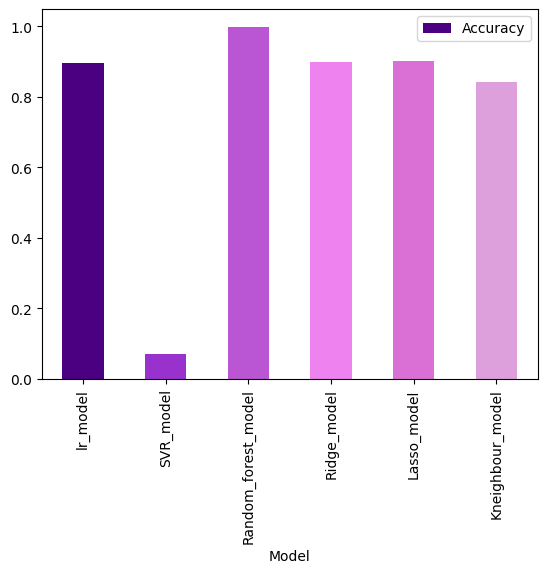

In [73]:
# title Model with highest accuracy

colors = ["INDIGO", "DARKORCHID", "mediumorchid", "violet", "orchid", "plum"]
model_df.plot.bar(x='Model', y='Accuracy', color = colors)

In [74]:
# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1e0, 1e1, 1e2, 1e3],
    'gamma': ['scale', 'auto']
}

# Create the SVR model
svr = SVR()

# Define the grid search object
grid_search = GridSearchCV(svr, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Create the SVR model with the best hyperparameters
best_svr = SVR(**best_params)

# Fit the best SVR model to the data
best_svr.fit(x_train, y_train)

# Evaluate the best SVR model on the test data
best_svr_score = best_svr.score(x_test, y_test)

# Print the best SVR model score
print(f"Best SVR model score: {best_svr_score}")

Best hyperparameters: {'C': 1000.0, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVR model score: 0.9996529611564763


In [75]:
accuracy_scores = [
    0.8962236639751814,
    0.9996573846803177,
    0.9993573304754797,
    0.9005863142932182,
    0.9023242333270463,
    0.8428284100008472,
]

In [76]:
model_list_1 = ["lr_model", "best_svr_score", "Random_forest_model", "Ridge_model", "Lasso_model", "Kneighbour_model"]

In [77]:
# Creating dataframe of model with their respective accuracy:
model_df = pd.DataFrame({"Model": model_list_1, "Accuracy": accuracy_scores})
model_df

,Model,Accuracy
0,lr_model,0.896224
1,best_svr_score,0.999657
2,Random_forest_model,0.999357
3,Ridge_model,0.900586
4,Lasso_model,0.902324
5,Kneighbour_model,0.842828


<Axes: xlabel='Model'>

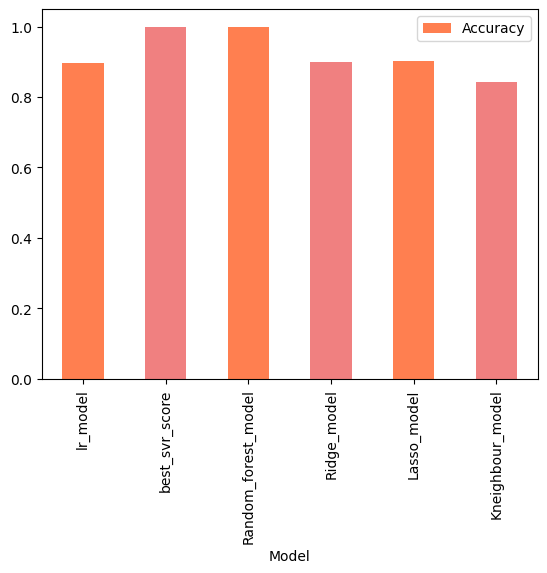

In [78]:
# title Model with highest accuracy

colors = ["coral", "lightcoral",]
model_df.plot.bar(x='Model', y='Accuracy', color = colors)

In [85]:
import pickle

In [86]:
# Save each model to a separate pickle file
models = [lr_model, best_svr_score, Random_forest_model, Ridge_model, Lasso_model, Kneighbour_model]
model_names = ['lr_model.pkl', 'best_svr_score.pkl', 'Random_forest_model.pkl','Ridge_model.pkl','Lasso_model.pkl','Kneighbour_model.pkl']

In [87]:
# Load the model from the pickle file
with open('lr_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [89]:
for model, model_name in zip(models, model_names):
    with open(model_name, 'wb') as f:
        pickle.dump(model, f)